In [1]:
import visa
import serial
import numpy as np
import time
import matplotlib.pyplot as plt
import io
rm = visa.ResourceManager()

In [ ]:
### Lock-in functions ###

#### Lock-in communication  ####
# This function communicate with the Lock-in via Serial port. Always check the Lock-in USB port before start.
# We send the cmd via write() function. We need to send the command as ASCII language and the '\n' to indicate the end
# of the command, so we use the encode function to translate the input to ASCII.
# The receive the Lock-in output with the readline() function, and save it in the array value. The strip() function will
# remove blank spaces from the output string. Usually, only when you ask the SNAP? to the Lock-in it will return an output.
# The decode() function will return the translation from ASCII.

def ask_lockin(cmd):
    lok = serial.Serial("COM4", baudrate=9600, parity=serial.PARITY_NONE, stopbits=serial.STOPBITS_ONE, bytesize=serial.EIGHTBITS, timeout=3)
    lok.write(str.encode(cmd+'\n'))
    lok.flush()
    value = lok.readline().strip()
    value = value.decode('ascii')
    lok.close()
    if 'SNAP?' in cmd:
        return value
        #print(value)
    else:
        return

### Manual Sense ###
# The Sensing() function will manually set the correct voltage range in the Lock-in front panel in order to increase the 
# measurement resolution. We can achieve the same result by using the cmd AGAN, when the time constant is less than 1 second.
# This function will set the maximum resolution (1V), and then will search the right resolution by comparing the the 
# front panel output to certain values. When the range is found, we set the final Lock-in resolution.
# This code will only work for output signals bigger than 5 mV, which is the minimum Vrms from the internal signal source
# of the Lock-in.

def Sensing():
    ask_lockin('SENS26')
    temp = ask_lockin('SNAP?9,3,4')
    temp = temp.split(",")
    V_out = float(temp[1])
    if (V_out < 0.0005):
        ask_lockin('SENS17')
        return
    elif (V_out >= 0.0005 and V_out < 0.001):
        ask_lockin('SENS18')
        return
    elif (V_out >= 0.001 and V_out < 0.003):
        ask_lockin('SENS19')
        return
    elif (V_out >= 0.003 and V_out < 0.008):
        ask_lockin('SENS20')
        return
    elif (V_out >= 0.008 and V_out < 0.018):
        ask_lockin('SENS21')
        return
    elif (V_out >= 0.018 and V_out < 0.048):
        ask_lockin('SENS22')
        return
    elif (V_out >= 0.048 and V_out < 0.090):
        ask_lockin('SENS23')
        return
    elif (V_out >= 0.090 and V_out < 0.190):
        ask_lockin('SENS24')
        return
    elif (V_out >= 0.190 and V_out < 0.490):
        ask_lockin('SENS25')
        return
    elif (V_out >= 0.490):
        ask_lockin('SENS26')
        return
    print(V_out)

In [2]:
#### Connecting Arduino ####
# Always check the Arduino USB port before start. 

arduino = serial.Serial('COM9')

('ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL9::INSTR', 'ASRL11::INSTR', 'ASRL12::INSTR')
KEITHLEY INSTRUMENTS INC.,MODEL 6487,1011608,A03   Jun 11 2003 15:25:16/A02  /B/E



'1\n'

1.1
1.2
2.1
2.2
3.1
3.2
4.1
4.2
5.1
5.2
6.1
6.2
7.1
7.2
8.1
8.2
9.1
9.2
10.1
10.2
11.1
11.2
12.1
12.2
13.1
13.2
14.1
14.2
15.1
15.2
16.1
16.2
17.1
17.2
18.1
18.2
19.1
19.2
20.1
20.2
21.1
21.2
22.1
22.2
23.1
23.2
24.1
24.2
25.1
25.2
26.1
26.2
27.1
27.2
28.1
28.2
29.1
29.2
30.1
30.2
31.1
31.2
32.1
32.2
33.1
33.2
34.1
34.2
35.1
35.2
36.1
36.2
37.1
37.2
38.1
38.2
39.1
39.2
40.1
40.2
41.1
41.2
42.1
42.2
43.1
43.2
44.1
44.2
45.1
45.2
46.1
46.2
47.1
47.2
48.1
48.2
49.1
49.2
50.1
50.2


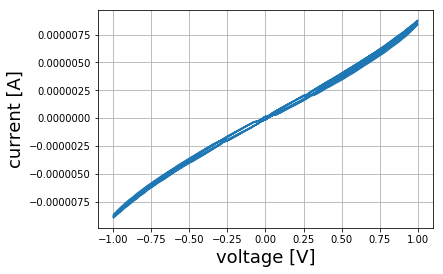

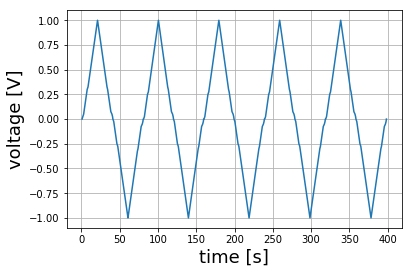

In [3]:
### LbL input parameters ###


n_bicamadas = 50
tempo_imerso_pos = 10 # min
tempo_imerso_neg = 10 # min
tempo_lavagem = 1 # sec
deslocamento = 56 # mm
nome_arq = 'CNTsPEI-GO_30-11-2020'

### aquisição de dados ###

tempo  = np.empty(shape=[0])
voltage = np.empty(shape=[0])
current  = np.empty(shape=[0])
t_i = time.time()

for v in voltage_space:
    pico.write("SOURce:VOLTage:AMPLitude " + str(v))
    pico.query("*OPC?")
    medida = pico.query("READ?")
    pico.query("*OPC?")
    tempo = np.append(tempo, [(time.time() - t_i)], axis=0)
    voltage = np.append(voltage, [v], axis=0)
    current = np.append(current, [float(medida.split(',')[0][:-1])], axis=0)

arq = open(nome_arq + '_0_0.dat', 'w')
arq.write('time (s)\tvoltage (V)\tcurrent (A)\n')
for i in range(len(tempo)):
    arq.write(str(tempo[i]) + '\t')
    arq.write(str(voltage[i]) + '\t')
    arq.write(str(current[i]) + '\n')
arq.close()


#for j in range(0, ciclos):
for j in range(0, n_bicamadas):
    print(str(j+1)+'.1')
    comando = '5,10,60,'+str(deslocamento)+','+str(tempo_imerso_pos)+','+str(tempo_lavagem)+'\n'
    arduino.write(comando.encode('utf-8'))
    arduino.readline()
    time.sleep(10)

    tempo = np.empty(shape=[0])
    voltage = np.empty(shape=[0])
    current = np.empty(shape=[0])
    t_i = time.time()
    
    for k in range(0, ciclos):
        for v in voltage_space:
            pico.write("SOURce:VOLTage:AMPLitude "+str(v))
            pico.query("*OPC?")
            medida = pico.query("READ?")
            pico.query("*OPC?")
            tempo = np.append(tempo, [(time.time() - t_i)], axis=0)
            voltage = np.append(voltage, [v], axis=0)
            current = np.append(current, [float(medida.split(',')[0][:-1])], axis=0)

    arq = open(nome_arq+'_'+str(j+1)+'_1.dat', 'w')
    arq.write('time (s)\tvoltage (V)\tcurrent (A)\n')
    for i in range(len(tempo)):
        arq.write(str(tempo[i]) + '\t')
        arq.write(str(voltage[i]) + '\t')
        arq.write(str(current[i]) + '\n')
    arq.close()

    print(str(j+1)+'.2')
    comando = '6,10,60,'+str(deslocamento)+','+str(tempo_imerso_neg)+','+str(tempo_lavagem)+'\n'
    arduino.write(comando.encode('utf-8'))
    arduino.readline()
    time.sleep(10)

    tempo = np.empty(shape=[0])
    voltage = np.empty(shape=[0])
    current = np.empty(shape=[0])
    t_i = time.time()

    for k in range(0, ciclos):
        for v in voltage_space:
            pico.write("SOURce:VOLTage:AMPLitude " + str(v))
            pico.query("*OPC?")
            medida = pico.query("READ?")
            pico.query("*OPC?")
            tempo = np.append(tempo, [(time.time() - t_i)], axis=0)
            voltage = np.append(voltage, [v], axis=0)
            current = np.append(current, [float(medida.split(',')[0][:-1])], axis=0)

    arq = open(nome_arq + '_' + str(j + 1) + '_2.dat', 'w')
    arq.write('time (s)\tvoltage (V)\tcurrent (A)\n')
    for i in range(len(tempo)):
        arq.write(str(tempo[i]) + '\t')
        arq.write(str(voltage[i]) + '\t')
        arq.write(str(current[i]) + '\n')
    arq.close()
    

    time.sleep(10)
    comando = '7,10,60,'+str(deslocamento)+','+str(tempo_imerso_neg)+','+str(tempo_lavagem)+'\n'
    arduino.write(comando.encode('utf-8'))
    arduino.readline()
    time.sleep(10)

pico.close()
arduino.close()

### gráfico ###

plt.plot(voltage,current)
plt.grid(True)
plt.xlabel('voltage [V]', fontsize=18)
plt.ylabel('current [A]', fontsize=18)

plt.show()

plt.plot(tempo,voltage)
plt.grid(True)
plt.ylabel('voltage [V]', fontsize=18)
plt.xlabel('time [s]', fontsize=18)

plt.show()
